# Computação Simbólica - SymPy
## Andre Nepomuceno - UFF
### Equações Diferenciais Ordinários (EDO)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
from sympy import I, pi,oo
sympy.init_printing()
%matplotlib inline

<font color='blue'>O método do SymPy para resolver EDO é sympy.dsolve().</font>

**Exemplo 1: Lei do resfriamento de Newton**

\begin{equation}
\frac{dT(t)}{dt} = -k[T(t)-T_a)
\end{equation}
Com a condição inicial $T(0) = T_0$.

In [2]:
#Primeiro, definimos os símbolos e a função T(t)
t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a",real=True)

In [3]:
T = sympy.Function('T')
T

T

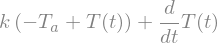

In [4]:
#Vamos criar a EDO
edo = sympy.diff(T(t),t)+k*(T(t)-Ta)
edo

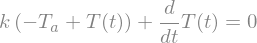

In [5]:
#representacao
sympy.Eq(edo,0)

In [6]:
edo_sol = sympy.dsolve(edo)
edo_sol

<font color='blue'>A solução 'edo_sol' tem os atributos 'lhs' e 'rhs.'</font>

In [7]:
edo_sol.lhs

In [8]:
edo_sol.rhs

<font color='blue'>Para determinar a constante C1, usamos a condinção inicial $T(0) = T_0$.
<br> A condição inicial (ou de contorno), devem ser passada como um dicionário ics:</font>

In [9]:
ics = {T(0):T0}
ics

In [10]:
#Agora vamos usar o método subs para determinar C1
#Simbolos nao determinados
edo_sol.free_symbols

In [11]:
C_eq = edo_sol.subs(t,0).subs(ics)
C_eq

In [12]:
#resolver para C1 e substituir na solução da EDO
C_sol = sympy.solve(C_eq)
C_sol

In [13]:
#Solução geral
edo_sol.subs(C_sol[0])

<font color='blue'>De forma mais geral, podemos passar o dicionário ics para a função dsolve.</font>

In [14]:
edo_sol = sympy.dsolve(edo,ics = {T(0):T0})
edo_sol

**Exemplo 2: Oscilador Amortecido**

\begin{equation}
\frac{d^2x}{dt^2} + 2\gamma \omega_0 \frac{dx}{dt} + \omega_0^2x = 0
\end{equation}

In [15]:
#Simbolos e função
t, omega0, gamma= sympy.symbols("t, omega_0, gamma",real=True,positive=True)
x = sympy.Function("x")

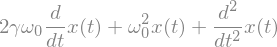

In [16]:
edo2 = sympy.diff(x(t),t,2) + 2 * gamma * omega0 * sympy.diff(x(t)) + omega0**2 * x(t)
edo2

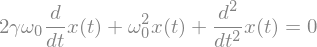

In [17]:
sympy.Eq(edo2,0)

In [18]:
edo2_sol = sympy.dsolve(edo2)
edo2_sol

In [19]:
#edo2_sol.args[1].args[0].args[1].args[0].simplify()

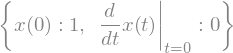

In [20]:
#condições iniciais
ics1 = {x(0): 1, x(t).diff(t).subs(t, 0): 0}
ics1

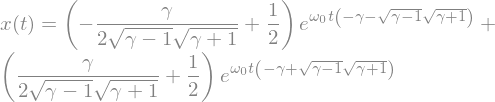

In [21]:
x_t_sol = sympy.dsolve(edo2,ics=ics1)
x_t_sol

In [22]:
#Caso critico: gamma =1
x_t_critico = sympy.limit(x_t_sol.rhs,gamma,1)
x_t_critico

In [23]:
w0 = 2 * sympy.pi
w0

<font color='blue'>Vamos plotar a solução para $\omega_0 = 2\pi$ para diferentes valores de $\gamma$.
<br> Vamos usar o método lambdifty.</font>

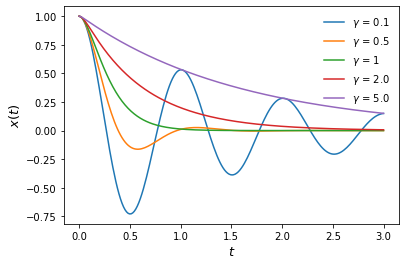

In [24]:
fig, ax = plt.subplots()
tt = np.linspace(0, 3, 200)
for g in [0.1,0.5,1,2.,5.]:
    if g==1:
        x_t = sympy.lambdify(t,x_t_critico.subs(omega0,w0),'numpy')
    else:
        x_t = sympy.lambdify(t,x_t_sol.rhs.subs({omega0:w0,gamma:g}),'numpy')
    ax.plot(tt,x_t(tt).real, label='$\gamma$ = {}'.format(g))
ax.set_xlabel('$t$',fontsize=13)
ax.set_ylabel('$x(t)$',fontsize=13)
ax.legend(frameon=False)

**Exercído: Resolda a EDO para o seguinte oscilador forçado :**

\begin{equation}
\frac{d^2x}{dt^2} + 2\gamma \omega_0 \frac{dx}{dt} + \omega_0^2x = F_0cos(\omega t)
\end{equation}

**Exemplo 3: Solução Aproximada**

\begin{equation}
\frac{dy(x)}{dx} = x + y(x)^2
\end{equation}

In [25]:
x = sympy.symbols("x")
y = sympy.Function("y")

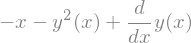

In [26]:
edo3 = sympy.diff(y(x),x) - x - y(x)**2
edo3

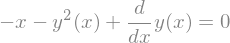

In [27]:
sympy.Eq(edo3,0)

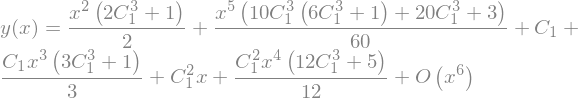

In [28]:
edo3_sol = sympy.dsolve(edo3,hint='1st_power_series',n=6)
edo3_sol

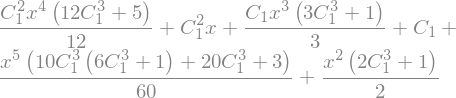

In [29]:
y_x = edo3_sol.rhs.removeO()
y_x